In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from datetime import datetime
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
lemmatizer=WordNetLemmatizer()
from nltk.corpus import wordnet
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import re
import numpy as np
from bs4 import BeautifulSoup
from nltk.stem import WordNetLemmatizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation

In [2]:
pd.set_option('display.max_rows', None)  # 显示所有行
pd.set_option('display.max_colwidth', None)  # 显示完整列宽

In [3]:
new_counts_df=pd.read_csv('new_counts_df.csv', encoding='latin1', index_col=0)

In [5]:
new_counts_df

,Counts,Percentage
Category,,
Negative,227319,32.020684
Neutral,344429,48.517072
Positive,138165,19.462244


In [7]:
import plotly.express as px
fig = px.pie(new_counts_df, values='Counts', names=new_counts_df.index, 
             labels={'Category': 'Sentiment Category', 'Counts': 'Count'},
             title='Distribution of Sentiment Categories in Comments',
             hole=0.3, 
             color_discrete_sequence=px.colors.qualitative.Set1)
fig.update_layout(paper_bgcolor='darkgrey')
fig.show()

In [4]:
content_filtered=pd.read_csv('content_filtered.csv', encoding='latin1', index_col=0)

In [5]:
top_10_pos_comments = content_filtered.nlargest(n=10, columns=['Compound'])["clean_text"]
print(top_10_pos_comments)

397997                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  

In [7]:
top_10_neg_comments = content_filtered.nsmallest(n=10, columns=['Compound'])["clean_text"]
for comment in top_10_neg_comments:
    print(comment.strip())

fyi one look like fall fake news bucket least accord al jazeera hamas twitter post al jazeera journalist arabic http http deeple translation twitter post here http d9 8a d8 a7 d8 b3 d8 b1 20 d8 a3 d8 a8 d9 88 d9 87 d9 84 d8 a7 d9 84 d8 a9 0a 40abuhilalah 0a e2 97 be ef b8 8f e2 97 be ef b8 8f d8 aa d8 a8 d9 8a d9 86 20 d9 85 d9 86 20 d8 ae d9 84 d8 a7 d9 84 20 d8 aa d8 ad d9 82 d9 8a d9 82 d8 a7 d8 aa 20 d8 ad d8 b1 d9 83 d8 a9 20 d8 ad d9 85 d8 a7 d8 b3 20 d8 a5 d9 86 20 d9 82 d8 b5 d8 a9 20 d8 a7 d8 ba d8 aa d8 b5 d8 a7 d8 a8 20 d8 a7 d9 84 d9 86 d8 b3 d8 a7 d8 a1 20 d9 81 d9 8a 20 23 d9 85 d8 b3 d8 aa d8 b4 d9 81 d9 d8 a7 d9 84 d8 b4 d9 81 d8 a7 d8 a1 20 d9 85 d8 ae d8 aa d9 84 d9 82 d8 a9 d8 8c 20 d8 b7 d8 a8 d8 b9 d8 a7 20 d8 a7 d9 84 d8 b9 d8 af d9 88 20 d9 84 d9 85 20 d9 8a d8 aa d9 88 d8 b1 d8 b9 20 d8 b9 d9 86 20 d8 ac d8 b1 d9 8a d9 85 d8 a9 20 d8 a5 d8 a8 d8 a7 d8 af d8 a9 20 0a e2 97 be ef b8 8f e2 97 be ef b8 8f d8 a8 d8 b1 d8 b1 d8 aa 20 d8 a7 d9 84 d8 b3 d9 8a d8 af d8 a

In [8]:
top_10_high_score_comments = content_filtered.sort_values('score', ascending=False)['clean_text'].drop_duplicates().head(10)
for comment in top_10_high_score_comments:
    print(comment.strip())

holy fuck pathetic loser hope swell as charge ban gym
create next generation fighter never forget
we never knowingly condone accept someone bet life save give nod start
lucky sure spell fuck funny way
damn every right upset
lucky alive hopefully help remove head as
like watch sim get arrest lmfaoo
nothing say strong like able control emotion assult others tantrum go jail time out
state emergency effect ecuador narcos military basically declare war cartel even take tv station today live air http amp amp amp
significant advance kind like step one make bear stew first catch bear


In [9]:
top_10_low_score_comments = content_filtered.sort_values('score', ascending=True)['clean_text'].drop_duplicates().head(10)
for comment in top_10_low_score_comments:
    print(comment.strip())

actor here stop use central cast line central cast cast extra background actor people notice film amp tv say someone straight cc say blend background lol
reason people offend others wear stupid red hat lol
there irony never understand lol edit hello israeli reddit army nice see effective per usual
me people who offend mask sure think
gt do understand hamas exist brutal occupation treatment palestinian gaza strip think so actually far know blockade essentially start after hamas violently take gaza strip fire rocket israel could definitely argue treatment palestinian gaza exacerbate radicalization palestinian think say cause hamas entirely accurate gt from outside clear brutal dehumanise israeli political military regime palestinian radical violent response be surely important deal cause problem first rather symptom agree me issue practical israel treat palestinian good without sacrifice security way magically give palestinian good life lift blockade without sacrifice security obviously 

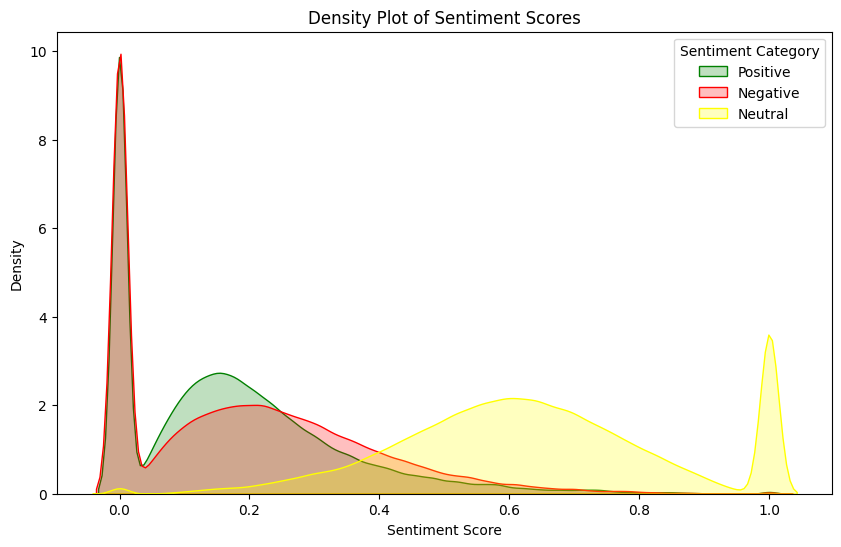

In [9]:
sentiment_categories = ["Positive", "Negative", "Neutral"]
colors = ['green', 'red', 'yellow']
plt.figure(figsize=(10, 6))
for category, color in zip(sentiment_categories, colors):
    sns.kdeplot(content_filtered[category], color=color, label=category, fill=True)
plt.xlabel('Sentiment Score')
plt.ylabel('Density')
plt.title('Density Plot of Sentiment Scores')
plt.legend(title='Sentiment Category')
plt.show()

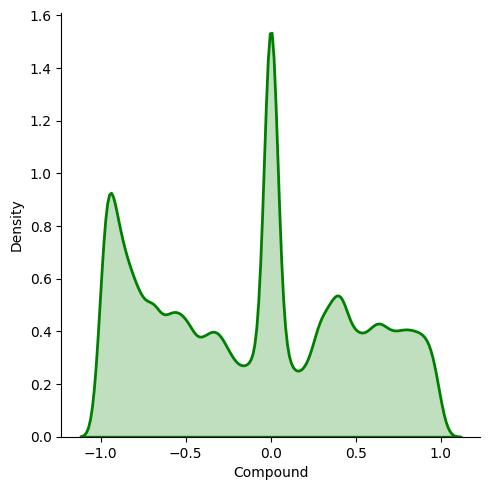

In [10]:
sns.displot(data=content_filtered, x="Compound", kind="kde", fill=True, color='green', linewidth=2)